In [1]:
import numpy as np
import sympy
from sympy import I, latex
from IPython.display import display, Latex
import matplotlib.pyplot as plt

# Практическое занятие 9
# Компьютерный практикум по алгебре на Python
## Комплексные числа в sympy

### Алгебраическая форма комплексного числа
$z = a + bi$, $a$ и $b$ вещественные числа, $i=\sqrt{-1}$ мнимая единица, $z$ - комплексное число. В Sympy мнимая единица записывается $I$, в Python $j$.
### Пример 1.
Даны комплексные числа
$$
z_1 = 2 + 3i,\quad z_2 = -3 + i,\quad z_3 = 5i,\quad z_4 = -i,\quad z_5 = -5 - 10i,
$$
вычислить
$$
3z_1 - 5z_2,\quad z_2^2 - 3z_1^3,\quad \sqrt{z_3},\quad z_4^{1 / 6},\quad z_5^{-2 / 7}.
$$

In [20]:
z1 = 2 + 3 * I
z2 = -3 + I
z3 = 5 * I
z4 = -I
z5 = -5 - 10 * I
display(Latex(latex((3 * z1 - 5 * z2, z2 ** 2 - 3 * z1 ** 3, z3 ** sympy.S.Half,
                     z4 ** (sympy.S(1) / 6), z5 ** (-sympy.S(2) / 7)))))

<IPython.core.display.Latex object>

Упростим выражения $z_2^2 - 3z_1^3$ и $z_5^{-2 / 7}$:

In [21]:
expr_z2 = z2 ** 2 - 3 * z1 ** 3
expr_z5 = z5 ** (-sympy.S(2) / 7)
display(Latex('{0} = {1},\qquad {2} = {3}'.format(*[latex(item)\
                            for item in (expr_z2,
                                         expr_z2.simplify(),
                                         expr_z5, expr_z5.simplify())])))

<IPython.core.display.Latex object>

Первое выражение получились в алгебраической форме, а второе нет. Приведем в подходящий вид второе выражение немного позже.
### Пример 2.
Вычисления Примера 1 проделаем для мнимой единицы из Python (numpy использует комплексные числа Python, своих отдельных нет). Для получения комплексных чисел в Python есть встроенная функция complex с аргументами - вещественной и мнимой частями комплексного числа.

In [4]:
z1 = complex(2, 3)
z2 = complex(-3, 1)
z3 = complex(0, 5)
z4 = complex(0, -1)
z5 = complex(-5, - 10)
display(3 * z1 - 5 * z2, z2 ** 2 - 3 * z1 ** 3, z3 ** (1 / 2), z4 ** (1 / 6), z5 ** (-2 / 7))

(21+4j)

(146-33j)

(1.5811388300841898+1.5811388300841895j)

(0.9659258262890683-0.25881904510252074j)

(0.4193012965072991+0.2754745230972611j)

Заметим, что у комплексного числа $n$ различных корней степени $n$, а у нас получился только один.

### Пример 3.
Для получения всех корней $n$-й степени комплексного числа в sympy есть функция root, ее аргументы - число (или выражение), степень корня и необязательный параметр - номер корня, по умолчанию 0, что соответствует главном значению корня. Используем ее для получения всех четвертой степени из $1 - i$:

In [5]:
n = 4
roots_list_3 = [sympy.root(1 - I, n, k) for k in range(n)]
display(Latex(latex(roots_list_3)))

<IPython.core.display.Latex object>

Для экономии памяти (имеет смысл в случае списка большой длины) можно использовать вместо списокв генераторы, но для отображения значений корней на экране нужно 

In [6]:
roots_gen_3 = (sympy.root(1 - I, n, k) for k in range(n))
display(Latex('{0}, {1}, {2}, {3}'.format(*(latex(item) for item in roots_gen_3))))

<IPython.core.display.Latex object>

Нехорошо явно перечислять количество корней в части '{0}, {1}, {2}, {3}', ведь впоследствии может понадобиться найти пять корней пятой степени или два корня второй. Для более универсальной организации вывода корней на экран можем воспользоваться автоматическим формированием строки с помощью метода строк join.

Удалить в конце строки ненужные символы можно с помощью .rstrip().

In [7]:
roots_gen_3 = (sympy.root(1 - I, n, k) for k in range(n))
my_text = ''.join([f'{{{i}}}, ' for i in range(n)]).rstrip(', ')
display(Latex(my_text.format(*(latex(item) for item in roots_gen_3))))

<IPython.core.display.Latex object>

Важно помнить, что генераторы - одноразовые объекты, дважды одним генератором воспользоваться нельзя, именно поэтому мы еще раз создали генератор, чтобы проемонстрировать другой вариант выведения корней на экран.

Можно на основе генератора построить tuple и вывести корни так:

In [8]:
roots_gen_3 = (sympy.root(1 - I, n, k) for k in range(n))
display(Latex(latex(tuple(roots_gen_3))))

<IPython.core.display.Latex object>

И еще один способ выведения корней на экран (вспомним enumerate и f-строки):

In [9]:
roots_gen_3 = (sympy.root(1 - I, n, k) for k in range(n))
display(Latex(''.join([f'r_{i} = {latex(item)}, ' for i, item in enumerate(roots_gen_3)]).rstrip(', ')))

<IPython.core.display.Latex object>

Для получения значения выражения, содержащего комплексные числа, в алгебраической форме можно использовать функцию expand_complex:

In [10]:
roots_3 = [sympy.expand_complex(item) for item in roots_list_3]
display(*[Latex(f'r_{i} = {latex(item)}') for i, item in enumerate(roots_3)])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Пример 4.
Изобразим на координатной плоскости точки, соответствующие корням из Примера 3, подпишем точки номерами корней и их формулами.

(-1.5, 1.5)

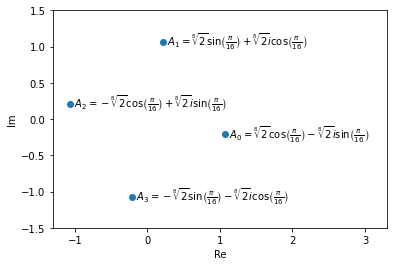

In [11]:
roots_x = [sympy.re(item) for item in roots_list_3]
roots_y = [sympy.im(item) for item in roots_list_3]
plt.scatter(roots_x, roots_y)
for k, x_coord in enumerate(roots_x): 
    plt.annotate('$A_' + str(k) + ' = ' + sympy.latex(roots_3[k]) + '$',
            xy=(x_coord, roots_y[k]), 
            xytext=(x_coord + 0.05, roots_y[k] - 0.05)) 
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-2.5, 4.5)
plt.ylim(-1.5, 1.5)

### Пример 5.
Для получения всех корней многочлена с учетом кратности в sympy есть функция roots (в sympy.polys.polyroots). Используем ее для получения всех корней третьей степени из $i$:

In [12]:
z = sympy.Symbol('z')
display(*[Latex(f'r_{i} = {latex(item)}') for i, item in enumerate(sympy.roots(z ** 3 - I))])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Пример 6.
Для получения значения выражения, содержащего комплексные числа, в алгебраической форме можно использовать функцию expand_complex, а можно выделить вещественную и мнимую часть выражения и составить из них комплексное число:

In [13]:
res6 = (3 - 7 * I) ** (-sympy.S(2) / 7)
sympy.re(res6) + sympy.im(res6) * I

58**(6/7)*cos(2*atan(7/3)/7)/58 + 58**(6/7)*I*sin(2*atan(7/3)/7)/58

## Тригонометрическая форма комплексного числа
$$
z = r(\cos(\varphi) + i\sin(\varphi)),
$$
где $r$  - модуль числа, $\varphi$ - аргумент (угол)
### Пример 7.
Запишем в тригонометрической форме комплексное число $\sqrt{3} - i$

In [14]:
z7 = 3 ** sympy.S.Half - 1 * I
r0 = sympy.functions.Abs(z7)
phi0 = sympy.functions.arg(z7)
r, phi = sympy.symbols('r phi')
z7_trig = r * (sympy.cos(phi) + sympy.sin(phi) * I)
display(Latex(f'{latex(z7_trig)},\quad r = {latex(r0)},\quad \phi = {latex(phi0)}'))

<IPython.core.display.Latex object>

Проверим подстановкой, что это то же самое число:

In [15]:
z7_trig.subs({r: r0, phi: phi0})

sqrt(3) - I

### Пример 8.
Изобразим комплексные числа $k(\sin(k\pi / 6) + i \cos(k\pi / 6)$, $k = 0, ..., 6$, заданные в тригонометрической форме, в полярной системе координат. Подписать точки $K$, $L$, $M$, $N$, $P$, $Q$, $R$.

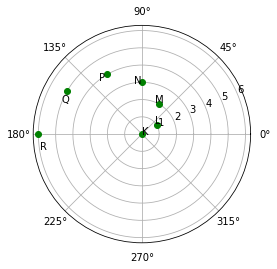

In [16]:
n = 7
names = ('K', 'L', 'M', 'N', 'P', 'Q', 'R')
arg_list = [k * np.pi / 6 for k in range(n)]
r_list = [k for k in range(n)]
plt.polar(arg_list, r_list, 'go')
for k, phi_k in enumerate(arg_list): 
    plt.annotate(names[k],
            xy=(phi_k, r_list[k]), 
            xytext=(phi_k + 0.15, r_list[k])) 

Обратим внимание, что в полярной системе координат координаты - угол и радиус (расстояние от точки о начала координат), поэтому для координат подписей к точкам тоже нужно использовать такие полярные координаты, а не $x$ и $y$.
## Комплексно-сопряженное число
$$
\bar z = a - bi
$$
комплексно-сопряженное число для $z = a + bi$. 
### Пример 9.
Найдем комплексно-сопряженные числа для $-3 + 2i$, $(\sqrt{2} - i)^3$, $(1 + i)^{1 / 3}$

In [17]:
display(*[Latex(f'{latex(item)} || {latex(sympy.conjugate(item))}') \
          for item in (-3 + 2 * I,
                       sympy.expand_complex((2 ** (sympy.S.Half) - 1 * I) ** 3),
                       sympy.expand_complex((1 + 1 * I) ** (1 / sympy.S(3))))
          ])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Произведение комплексного числа и его комплексно-сопряженного
равно квадрату модуля комплексного числа.
### Пример 10.
Проверим $\bar z\cdot z = |z|^2$.

In [18]:
a, b = sympy.symbols('a b', real=True)
z8 = a + b * I
display(sympy.expand_complex(sympy.conjugate(z8) * z8), sympy.functions.Abs(z8) ** 2)

a**2 + b**2

a**2 + b**2